# Project: Arabic Movies investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
# Import statements for all of the packages that we gonna used for the following cells
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

<a id='intro'></a>
# Introduction

#### The dataset selected is the arabic movies dataset.

In [2]:
# Load your data and print out a few lines.
df = pd.read_csv('data.csv')
df.head(10)

,اسم الفيلم,تاريخ العرض,تصنيف الفيلم,مدة الفيلم (دقيقة),ملخص,تأليف,تمثيل,إنتاج,تصوير,مونتاج,ديكور,ملابس,موسيقى,إخراج,توزيع
0,قلب المرأة,6 مايو 1940,ﺭﻭﻣﺎﻧﺴﻲ,87,تدور أحداث الفيلم حول (خيرية)، الفتاة الثرية ا...,توجو مزراحي (أحمد المشرقي),"سليمان نجيب,أمينة رزق,دولت أبيض,عقيلة راتب,سلو...",NaN,عبدالحليم نصر,NaN,NaN,NaN,NaN,توجو مزراحي (أحمد المشرقي),منتخبات بهنا فيلم
1,الورشة,28 نوفمبر 1940,ﺩﺭاﻣﺎ,105,يسافر الأسطى (علي عبدالرحمن) صاحب ورشة الميكان...,"عزيزة أمير,محمود ذو الفقار","عزيزة أمير,محمود ذو الفقار,أنور وجدي,نجمة إبرا...",إيزيس فيلم,"أرام ماراليان,فيرى فاركاش (فرانسوا فاركاش)",NaN,محمد كامل,NaN,عبدالحميد عبدالرحمن,إستيفان روستي,منتخبات بهنا فيلم
2,تحت السلاح,8 فبراير 1940,NaN,101.4,أمينة فتاة من أسرة عريقة، تقرر العائلة زواجها ...,NaN,"أحمد علام,زوزو شكيب,عباس فارس,محمد الديب,زينات...",ألفيزى اورفانيللى,NaN,NaN,NaN,NaN,NaN,فؤاد الجزايرلي,NaN
3,حياة الظلام,1940,ﺩﺭاﻣﺎ,94,عائلة متوسطة الحال مكونة من زوج وزوجة وابنهما ...,"محمود كامل حسن,أحمد بدرخان","ميمي شكيب,محسن سرحان,روحية خالد,فردوس محمد,علي...",محمد جمال الدين رفعت,محمد عبدالعظيم,جمال مدكور,"علي عابد,روبرت شارفنبرج",NaN,"بيرم التونسي,عبدالحميد عبدالرحمن,محمد الكحلاوي...","أحمد بدرخان,فريد الجندي",NaN
4,صرخة في الليل,31 اكتوبر 1940,NaN,110,لا تحفظ الزوجة الساقطة شرف زوجها الثرى فترتبط ...,السيد زيادة,"بدر لاما,رجاء عبده,سميحة سميح,بشارة واكيم,منسى...",كوندور فيلم,إبراهيم شيبا,"بدر لاما,ألبير نجيب",محروس زيادة,NaN,"فريد غصن,يوسف صالح",إبراهيم لاما,منتخبات بهنا فيلم
5,أصحاب العقول,1940,NaN,101.4,كتب أحد المستكشفين الأوربيين إلى صديقه حمدي بك...,NaN,"بهيجة المهدي,بشارة واكيم,فوزي منيب,سليمان نجيب",افلام وادى النيل (فهمي داود وشركاه),ألفيزى اورفانيللى,NaN,NaN,NaN,NaN,ألفيزى اورفانيللى,NaN
6,الباشمقاول,18 يناير 1940,ﻛﻮﻣﻴﺪﻱ,85,"تدور أحداث الفيلم حول المحامي ""ممتاز"" الذي يهو...","بديع خيري,توجو مزراحي (أحمد المشرقي)","فوزي الجزايرلي,ميمي شكيب,إحسان الجزايرلي,زوزو ...","توجو مزراحي (أحمد المشرقي),عبدالحميد زكي","محمود نصر,عبدالحليم نصر",NaN,NaN,NaN,فريد غصن,"توجو مزراحي (أحمد المشرقي),إبراهيم حلمي",منتخبات بهنا فيلم
7,فتاة متمردة,18 مايو 1940,NaN,110,درية طالبة فى مدرسة داخلية، تربطها علاقة حب بش...,أحمد جلال,"ماري كويني,محسن سرحان,أنور وجدي,عباس فارس,بديع...",لوتس فيلم (آسيا وشركاها),"عبدالمنعم صبحى,توليو كيارينى",ماري كويني,NaN,NaN,"يوسف صالح,عبدالعزيز سلام,فريد غصن,ماري كويني,ش...","أحمد جلال,محمد زكى محمود",منتخبات بهنا فيلم
8,رجل بين امراتين,7 اكتوبر 1940,NaN,95,يتعرف رافت الرسام على امال عبد الشافى وهو يصطا...,السيد زيادة,"بدر لاما,أمينة رزق,بدرية رأفت,فردوس محمد,عبدال...",كوندور فيلم,عبدالله الشيب,"ألبير نجيب,بدر لاما","ستوديو لاما,محروس زيادة",NaN,"يوسف صالح,سامي نعسان,أمينة رزق,بدر لاما,زوزو ش...",إبراهيم لاما,منتخبات بهنا فيلم
9,يوم سعيد,15 يناير 1940,ﺭﻭﻣﺎﻧﺴﻲ,125,(محمد كمال) شاب بسيط يهوى الموسيقى والغناء، وي...,"محمد كريم,عبدالوارث عسر,عباس علام","محمد عبدالوهاب,علوية جميل,فاطمة محجوب,فاتن حما...",أفلام عبدالوهاب,"محمد عبدالعظيم,جورج بنوا,بريما فيرا,مصطفى حسن",محمد كريم,حسين رستم,NaN,"محمد عبدالوهاب,أحمد رامي,عزت الهجين,بشارة الخو...",محمد كريم,NaN


<a id='cleaning'></a>
## Data Cleaning
<ul>
    <li> <a href='#Remove'>Remove un-needed features</a>
    <li> <a href="#Rename">Rename columns </a>
    <li> <a href="#Null">Remove null</a>
<ul>

In [3]:
# The shape of the database
df.shape

(2372, 15)

In [4]:
##Now it is time to discuss the structure of the data to find if it is cleaned or not by three steps
# 1. rename columns to english in order to easily process them
# 2. remove rows that contain null values
# 3. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 15 columns):
اسم الفيلم            2372 non-null object
تاريخ العرض           2372 non-null object
تصنيف الفيلم          1219 non-null object
مدة الفيلم (دقيقة)    2372 non-null object
ملخص                  2071 non-null object
تأليف                 2098 non-null object
تمثيل                 2270 non-null object
إنتاج                 1824 non-null object
تصوير                 1908 non-null object
مونتاج                1740 non-null object
ديكور                 1470 non-null object
ملابس                 276 non-null object
موسيقى                1398 non-null object
إخراج                 2196 non-null object
توزيع                 1114 non-null object
dtypes: object(15)
memory usage: 278.0+ KB


<a id='Remove'></a>
### Remove un-needed features

**In this section, we just remove un-needed features to fastin processing**

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#imdb_id
columns_deleted=['تأليف','ملابس','مدة الفيلم (دقيقة)','مونتاج','تصوير','موسيقى','توزيع','إخراج','ديكور','إنتاج','إنتاج','ملخص']
df.drop(columns_deleted,axis=1,inplace= True)

In [6]:
df.head()

,اسم الفيلم,تاريخ العرض,تصنيف الفيلم,تمثيل
0,قلب المرأة,6 مايو 1940,ﺭﻭﻣﺎﻧﺴﻲ,"سليمان نجيب,أمينة رزق,دولت أبيض,عقيلة راتب,سلو..."
1,الورشة,28 نوفمبر 1940,ﺩﺭاﻣﺎ,"عزيزة أمير,محمود ذو الفقار,أنور وجدي,نجمة إبرا..."
2,تحت السلاح,8 فبراير 1940,NaN,"أحمد علام,زوزو شكيب,عباس فارس,محمد الديب,زينات..."
3,حياة الظلام,1940,ﺩﺭاﻣﺎ,"ميمي شكيب,محسن سرحان,روحية خالد,فردوس محمد,علي..."
4,صرخة في الليل,31 اكتوبر 1940,NaN,"بدر لاما,رجاء عبده,سميحة سميح,بشارة واكيم,منسى..."


<a id='Rename'></a>
### Rename columns

**In this section, we just rename column in english in order to easily process**

In [7]:
df.rename(columns={'اسم الفيلم': 'original_title', 'تاريخ العرض': 'release_date','تصنيف الفيلم': 'genres','تمثيل': 'cast'},
          inplace=True)


In [8]:
df.head()

,original_title,release_date,genres,cast
0,قلب المرأة,6 مايو 1940,ﺭﻭﻣﺎﻧﺴﻲ,"سليمان نجيب,أمينة رزق,دولت أبيض,عقيلة راتب,سلو..."
1,الورشة,28 نوفمبر 1940,ﺩﺭاﻣﺎ,"عزيزة أمير,محمود ذو الفقار,أنور وجدي,نجمة إبرا..."
2,تحت السلاح,8 فبراير 1940,NaN,"أحمد علام,زوزو شكيب,عباس فارس,محمد الديب,زينات..."
3,حياة الظلام,1940,ﺩﺭاﻣﺎ,"ميمي شكيب,محسن سرحان,روحية خالد,فردوس محمد,علي..."
4,صرخة في الليل,31 اكتوبر 1940,NaN,"بدر لاما,رجاء عبده,سميحة سميح,بشارة واكيم,منسى..."


<a id='Null'></a>
### Remove Null and Duplicates

**In this section, we just remove the rows that contain null values along with duplicates**

First detect which column has null values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 4 columns):
original_title    2372 non-null object
release_date      2372 non-null object
genres            1219 non-null object
cast              2270 non-null object
dtypes: object(4)
memory usage: 74.2+ KB


**Explanation**

We can easily detect that there are already columns that contain null values such as
        <ul>
            <li>genres
            <li>cast
        </ul>
Because the data contains 2372 rows while these features have fewer values than expected.

**Cast and Genres both might affect our analysis and we cannot replace these NaN  with any values since they are qualtative values not quantative one that is why we need to remove them** 

> **Number of Null values per column**

In [10]:
#making sure that everthing is going in the right way
df.isnull().sum()

original_title       0
release_date         0
genres            1153
cast               102
dtype: int64

In [11]:
#Dropping rows contained NaN
df.dropna(axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 4 columns):
original_title    1211 non-null object
release_date      1211 non-null object
genres            1211 non-null object
cast              1211 non-null object
dtypes: object(4)
memory usage: 37.9+ KB


> **Number of Duplicates**

In [13]:
df.duplicated().sum()

1

In [14]:
#Dropping duplicated values
df.drop_duplicates(inplace=True)

Final data shape

In [15]:
df.shape

(1210, 4)

In [16]:
df.head(10)

,original_title,release_date,genres,cast
0,قلب المرأة,6 مايو 1940,ﺭﻭﻣﺎﻧﺴﻲ,"سليمان نجيب,أمينة رزق,دولت أبيض,عقيلة راتب,سلو..."
1,الورشة,28 نوفمبر 1940,ﺩﺭاﻣﺎ,"عزيزة أمير,محمود ذو الفقار,أنور وجدي,نجمة إبرا..."
2,حياة الظلام,1940,ﺩﺭاﻣﺎ,"ميمي شكيب,محسن سرحان,روحية خالد,فردوس محمد,علي..."
3,الباشمقاول,18 يناير 1940,ﻛﻮﻣﻴﺪﻱ,"فوزي الجزايرلي,ميمي شكيب,إحسان الجزايرلي,زوزو ..."
4,يوم سعيد,15 يناير 1940,ﺭﻭﻣﺎﻧﺴﻲ,"محمد عبدالوهاب,علوية جميل,فاطمة محجوب,فاتن حما..."
5,الفرسان الثلاثة,15 مايو 1941,ﻛﻮﻣﻴﺪﻱ,"فوزي الجزايرلي,عقيلة راتب,إحسان الجزايرلي,فردو..."
6,ليلى بنت مدارس,16 اكتوبر 1941,اﺳﺘﻌﺮاﺿﻲ,"يوسف وهبي,ليلى مراد,ميمي شكيب,محسن سرحان,بشارة..."
7,امرأة خطرة,10 ابريل 1941,ﺩﺭاﻣﺎ,"آسيا داغر,حسين صدقي,عباس فارس,روحية خالد,زينب ..."
8,ألف ليلة وليلة,20 مارس 1941,ﻣﻐﺎﻣﺮاﺕ,"علي الكسار,عقيلة راتب,حامد مرسي,علي عبدالعال,ز..."
9,انتصار الشباب,24 مارس 1941,اﺳﺘﻌﺮاﺿﻲ,"أسمهان,فريد الأطرش,أنور وجدي,بشارة واكيم,عبدال..."


<a id='eda'></a>
## Exploratory Data Analysis</a></li>

In [17]:
df['genres'].value_counts()

ﺩﺭاﻣﺎ           440
ﺭﻭﻣﺎﻧﺴﻲ         256
ﻛﻮﻣﻴﺪﻱ          242
اﺳﺘﻌﺮاﺿﻲ         83
ﺟﺮﻳﻤﺔ            65
تاريخي           29
ﺣﺮﻛﺔ             26
ﺗﺸﻮﻳﻖ ﻭﺇﺛﺎﺭﺓ     12
ﻣﻐﺎﻣﺮاﺕ          11
ﻏﻤﻮﺽ             10
ﺳﻴﺮﺓ ﺫاﺗﻴﺔ        8
ﺣﺮﺏ               7
ﺧﻴﺎﻝ ﻋﻠﻤﻲ         5
ﻗﺼﻴﺮ              4
ﺭﻳﺎﺿﻲ             3
ﻋﺎﺋﻠﻲ             3
ﺧﻴﺎﻝ              2
ﻭﺛﺎﺋﻘﻲ            2
ﺭﻋﺐ               1
ﺭﺳﻮﻡ ﻣﺘﺤﺮﻛﺔ       1
Name: genres, dtype: int64

**We need to translate genres into English to be able to visulize them.**

In [18]:
df['genres']=df['genres'].replace({'ﺩﺭاﻣﺎ': 'Drama',
                      'ﺭﻭﻣﺎﻧﺴﻲ': 'Romance',
                      'ﻛﻮﻣﻴﺪﻱ': 'Comedy',
                      'اﺳﺘﻌﺮاﺿﻲ':'Musical',
                      'ﺟﺮﻳﻤﺔ':'Crime',
                      'تاريخي':'Historical',
                      'ﺣﺮﻛﺔ':'Action',
                      'ﺗﺸﻮﻳﻖ ﻭﺇﺛﺎﺭﺓ':'Thriller & Excitement',
                      'ﻣﻐﺎﻣﺮاﺕ':'Adventure',
                      'ﻏﻤﻮﺽ':'Mystery',
                      'ﺳﻴﺮﺓ ﺫاﺗﻴﺔ':'Autobiography',
                      'ﺣﺮﺏ':'War',
                      'ﺧﻴﺎﻝ ﻋﻠﻤﻲ':'Science-fiction',
                      'ﻗﺼﻴﺮ':'Short-film',
                      'ﺭﻳﺎﺿﻲ':'Sports',
                      'ﻋﺎﺋﻠﻲ':'Family',
                      'ﻭﺛﺎﺋﻘﻲ':'Documentary',
                      'ﺧﻴﺎﻝ':'Fiction',
                      'ﺭﺳﻮﻡ ﻣﺘﺤﺮﻛﺔ':'Animation',
                      'ﺭﻋﺐ':'Horror'
                     });

In [19]:
df['genres'].value_counts()

Drama                    440
Romance                  256
Comedy                   242
Musical                   83
Crime                     65
Historical                29
Action                    26
Thriller & Excitement     12
Adventure                 11
Mystery                   10
Autobiography              8
War                        7
Science-fiction            5
Short-film                 4
Family                     3
Sports                     3
Fiction                    2
Documentary                2
Animation                  1
Horror                     1
Name: genres, dtype: int64

In [20]:
#Getting the genres column and put it into a new dataframe
genres_col=df[['original_title','genres']]
genres_df = pd.DataFrame(genres_col)
genres_df.head()

,original_title,genres
0,قلب المرأة,Romance
1,الورشة,Drama
2,حياة الظلام,Drama
3,الباشمقاول,Comedy
4,يوم سعيد,Romance


In [21]:
# Spliting the genres from dataframe/
genres_splitted_df  = pd.concat([df['genres'],df['original_title']], axis=1, keys=['genres','original_title'])
genres_splitted_df.head()

,genres,original_title
0,Romance,قلب المرأة
1,Drama,الورشة
2,Drama,حياة الظلام
3,Comedy,الباشمقاول
4,Romance,يوم سعيد


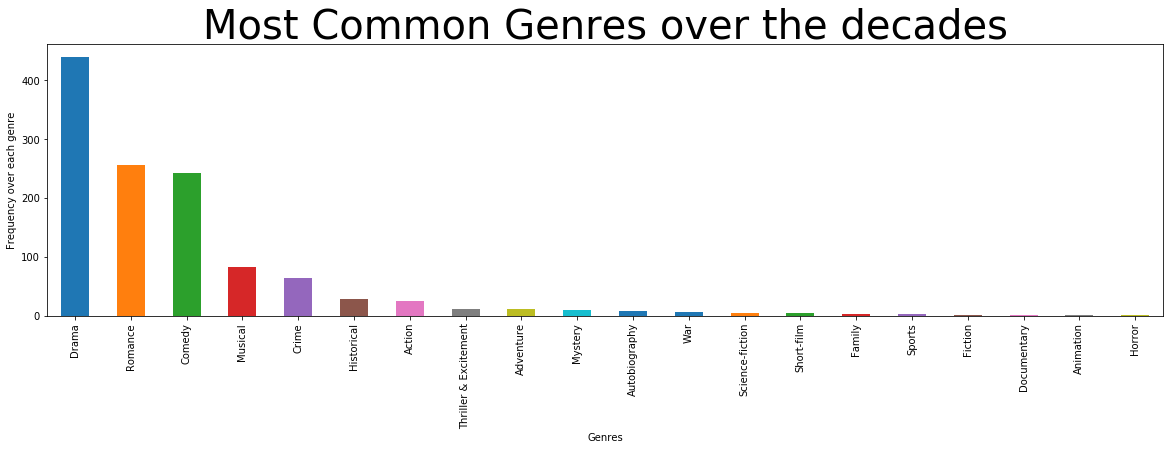

In [22]:
# Create a bar chart to see the distribuation
genres_splitted_df['genres'].value_counts().plot(kind='bar',figsize=(20,5))
plt.title('Most Common Genres over the decades',fontsize=40)
plt.xlabel('Genres',fontsize=10)
plt.ylabel('Frequency over each genre' ,fontsize=10)
plt.show();

In [23]:
df.cast.head(10)

0    سليمان نجيب,أمينة رزق,دولت أبيض,عقيلة راتب,سلو...
1    عزيزة أمير,محمود ذو الفقار,أنور وجدي,نجمة إبرا...
2    ميمي شكيب,محسن سرحان,روحية خالد,فردوس محمد,علي...
3    فوزي الجزايرلي,ميمي شكيب,إحسان الجزايرلي,زوزو ...
4    محمد عبدالوهاب,علوية جميل,فاطمة محجوب,فاتن حما...
5    فوزي الجزايرلي,عقيلة راتب,إحسان الجزايرلي,فردو...
6    يوسف وهبي,ليلى مراد,ميمي شكيب,محسن سرحان,بشارة...
7    آسيا داغر,حسين صدقي,عباس فارس,روحية خالد,زينب ...
8    علي الكسار,عقيلة راتب,حامد مرسي,علي عبدالعال,ز...
9    أسمهان,فريد الأطرش,أنور وجدي,بشارة واكيم,عبدال...
Name: cast, dtype: object

In [24]:
df.cast.iloc[0]

'سليمان نجيب,أمينة رزق,دولت أبيض,عقيلة راتب,سلوى علام,زوزو نبيل,نادية أحمد,نينا زاكى,أنور وجدي,حسن فايق,فاخر فاخر,محمود المليجي,زكي إبراهيم,حسن مختار صقر,عزيزة محمد,مرجريت صفير,مختار عثمان,لطفي الحكيم'

In [25]:
# Spliting the cast of each film.
actors = df.cast.str.split(',', expand=True).stack().reset_index(level=1,drop=True)
film_name = df['original_title']
geners = df['genres']

df_splitted  = pd.concat([actors,film_name,geners], axis=1, keys=['actor','original_title','geners'])
df_splitted.head(18)

,actor,original_title,geners
0,سليمان نجيب,قلب المرأة,Romance
0,أمينة رزق,قلب المرأة,Romance
0,دولت أبيض,قلب المرأة,Romance
0,عقيلة راتب,قلب المرأة,Romance
0,سلوى علام,قلب المرأة,Romance
0,زوزو نبيل,قلب المرأة,Romance
0,نادية أحمد,قلب المرأة,Romance
0,نينا زاكى,قلب المرأة,Romance
0,أنور وجدي,قلب المرأة,Romance
0,حسن فايق,قلب المرأة,Romance


**These are the top 10 actor participating in fims**

In [34]:
# Get the number of actors
df_splitted['actor'].nunique()

3437

In [43]:
# Top 20 preforming actors
df_splitted['actor'].value_counts().head(60)

عبدالغني النجدي       233
حسين إسماعيل          220
عبدالمنعم إسماعيل     209
محمود المليجي         207
محسن حسنين            173
محمد شوقي             155
فريد شوقي             153
عبدالمنعم بسيوني      137
إسماعيل يس            136
توفيق الدقن           136
عماد حمدي             133
مختار السيد           132
مطاوع عويس            130
عبدالحميد بدوي        129
ثريا فخري             126
وداد حمدي             119
محمد صبيح             115
رياض القصبجي          111
شكري سرحان            108
عبدالمنعم إبراهيم     107
صالح الإسكندراني      107
رشدي أباظة            105
زكي إبراهيم           104
زينات صدقي            103
عبدالعظيم كامل        101
عزيزة حلمي            100
حسين رياض              96
عباس الدالي            96
طوسون معتمد            96
عبد المنعم سعودي       95
عبدالحميد زكي          95
إبراهيم حشمت           94
شفيق نور الدين         94
صلاح نظمي              90
عدلي كاسب              90
عبدالسلام النابلسي     88
ميمي شكيب              88
نجوى فؤاد              87
فردوس محمد  

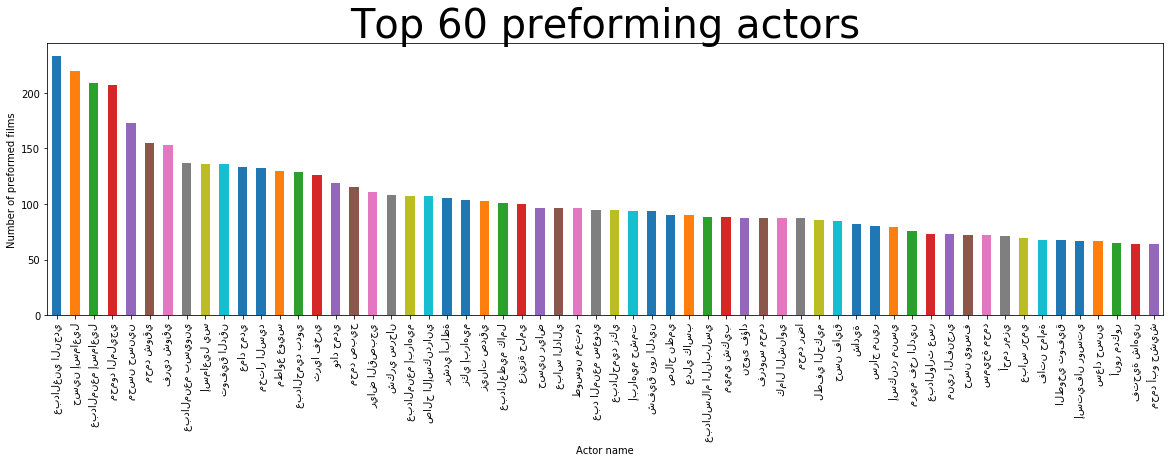

In [48]:
# Create a bar chart to see the distribuation
df_splitted['actor'].value_counts().head(60).plot(kind='bar',figsize=(20,5))
plt.title('Top 60 preforming actors',fontsize=40)
plt.xlabel('Actor name',fontsize=10)
plt.ylabel('Number of preformed films' ,fontsize=10)
plt.show();

**Follow Up**: We need to translate names from Arabic into English

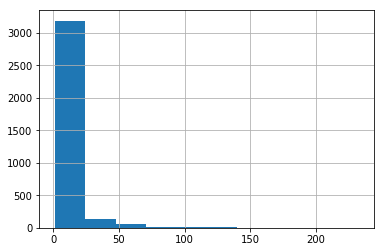

In [49]:
df_splitted['actor'].value_counts().hist()

**Importgoogle.cloud.translate api in order to translate actors names from Arabic to English**

In [50]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="translate_key.json"
from google.cloud import translate
translator = translate.Client()

In [51]:
def translate(text):
    result = translator.translate(text,source_language='ar',target_language='en')
    return result['translatedText']

In [ ]:
names = {}
for name in list(df_splitted.actor):
    translation = translate(name)
    names[name]=translation

In [ ]:
names

In [ ]:
from googletrans import Translator
translator = Translator()

translated = translator.translate('عبدالمنعم إسماعيل', src='ar',dest='en')
# <Translated src=la dest=en text=The truth is my light pronunciation=The truth is my light>

In [ ]:
translated.text

In [ ]:
# Create a bar chart to see the distribuation
df_splitted['actor'].value_counts(20).plot(kind='bar',figsize=(20,5))
plt.title('Most Common Genres over the decades',fontsize=40)
plt.xlabel('Genres',fontsize=10)
plt.ylabel('Frequency over each genre' ,fontsize=10)
plt.show();